```python
polynomial regression generally performs underfitting for lower degrees and overfitting for higher degrees
```

```python
even though it is polynomial still we call it as a linear regression because the relation between target variable(y) and the coefficients is linear
    y = Beta0 + Beta1(x1) + Beta2(x1)^2 + Beta3(x2) + Beta4(x2)^2
```

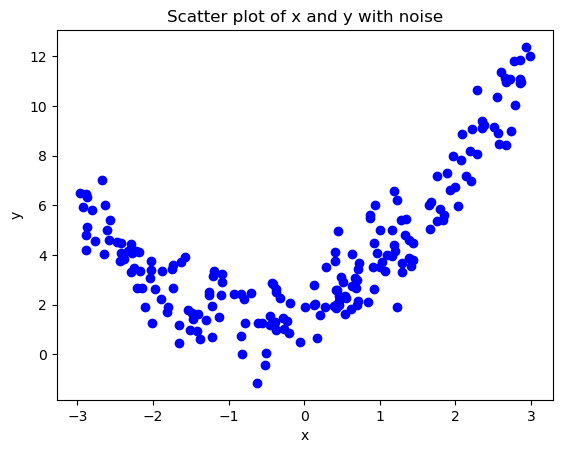

In [52]:
import numpy as np

import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
x = 6 * np.random.rand(200,1) - 3
y = 0.8 * x**2 + 1.1 * x + 2 + np.random.randn(200,1)

# Plot the data
plt.scatter(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y with noise')
plt.show()

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [54]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(X_test)
y_pred

array([[2.28703708],
       [1.66654463],
       [2.81259214],
       [3.73386533],
       [5.36800195],
       [3.66489592],
       [1.72447867],
       [4.46927655],
       [6.23047289],
       [5.43559408],
       [6.40678254],
       [4.83223671],
       [6.63163105],
       [3.01660605],
       [4.56355758],
       [7.0984951 ],
       [5.32236572],
       [2.15333999],
       [1.51809856],
       [6.51627829],
       [3.84155296],
       [1.23434789],
       [5.71724116],
       [5.73071462],
       [3.48545324],
       [2.13058166],
       [4.76359299],
       [1.73095649],
       [5.0206194 ],
       [1.97881735],
       [3.58051036],
       [6.13008942],
       [2.14569596],
       [1.35687666],
       [2.06908098],
       [2.71051946],
       [4.92036834],
       [5.32296317],
       [7.40492505],
       [2.93048286],
       [1.87064789],
       [2.74671303],
       [7.19969136],
       [1.86771994],
       [7.27937027],
       [4.27176577],
       [3.78217203],
       [6.723

In [57]:
r2_score(y_test,y_pred)

0.3114101148717109

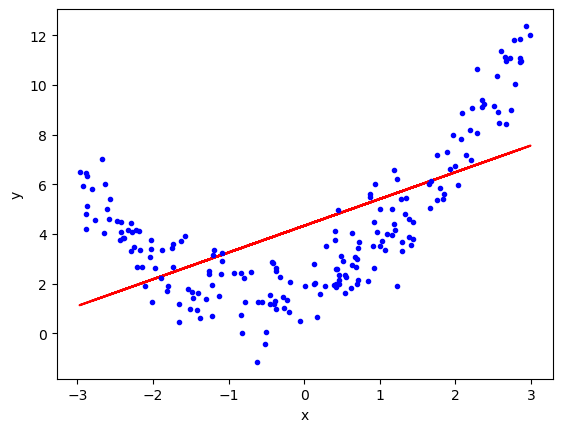

In [ ]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(x,y,"b.") # the b signifies the blue color and . shows the marker
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [66]:
poly = PolynomialFeatures(degree=2,include_bias=True)
# include_bias by default is true , but if we make it false we will not get the 1 that is we will not get the constant value
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [67]:
print(X_train[0])
print(X_train_trans[0])

[-1.65645187]
[ 1.         -1.65645187  2.7438328 ]


In [68]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)


LinearRegression()

In [69]:
y_pred_poly = lr.predict(X_test_trans)
y_pred_poly

array([[ 2.99050936],
       [ 4.70541926],
       [ 2.00353554],
       [ 1.30368495],
       [ 3.29000727],
       [ 1.31064243],
       [ 4.52011077],
       [ 1.68673031],
       [ 6.00268638],
       [ 3.46107274],
       [ 6.69878407],
       [ 2.18392471],
       [ 7.65623959],
       [ 1.73545046],
       [ 1.79629991],
       [ 9.89386099],
       [ 3.17850287],
       [ 3.3097146 ],
       [ 5.20392053],
       [ 7.15527891],
       [ 1.30752587],
       [ 6.25158241],
       [ 4.24990687],
       [ 4.29071661],
       [ 1.36319849],
       [ 3.36680289],
       [ 2.07427871],
       [ 4.49971327],
       [ 2.52225735],
       [ 3.76796928],
       [ 1.32915761],
       [ 5.62782561],
       [ 3.32880001],
       [ 5.78391382],
       [ 3.52507999],
       [ 2.16181341],
       [ 2.33537873],
       [ 3.17994184],
       [11.54569747],
       [ 1.84077316],
       [ 4.07563178],
       [ 2.10384726],
       [10.42331492],
       [ 4.08421107],
       [10.85133058],
       [ 1

In [70]:
r2_score(y_test,y_pred_poly)

0.8540855584298896

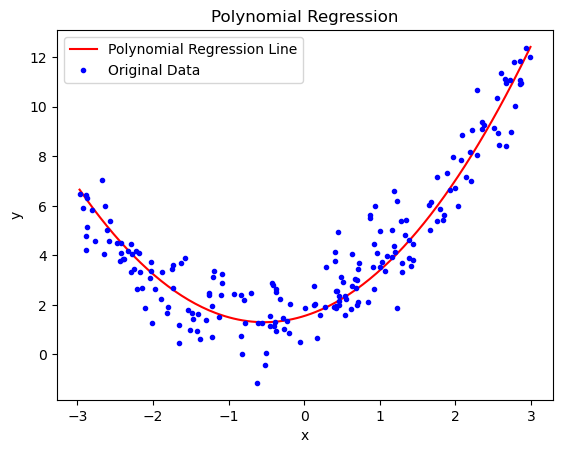

In [75]:
x_range = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = lr.predict(x_range_poly)

# Plot the original data and the polynomial regression line
plt.plot(x_range, y_range_pred, color='r', label='Polynomial Regression Line')
plt.plot(x, y, 'b.', label='Original Data')  # Scatter plot of original data
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

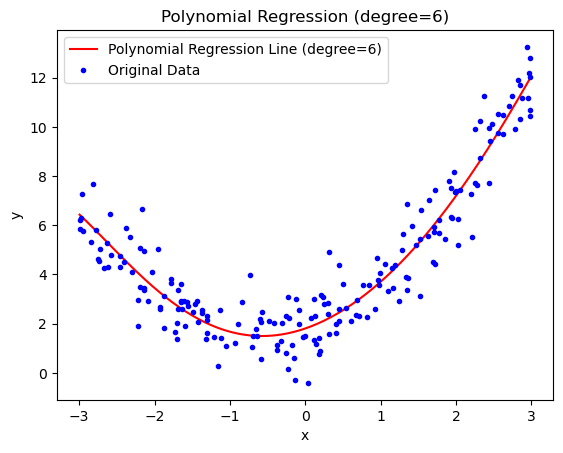

Mean Squared Error (degree=6): 1.293239190496852
coefficient value is:  [[0.         0.94653337 0.8958008 ]]
Intercept value is:  [1.55298786]
The model has a reasonable fit.


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def polynomial_regression(x, y, degree):
    X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Generate predictions
    x_range = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(x_range_poly)

    # Plot the original data and the polynomial regression line
    plt.plot(x_range, y_range_pred, color='r', label=f'Polynomial Regression Line (degree={degree})')
    plt.plot(x, y, 'b.', label='Original Data')  # Scatter plot of original data
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.legend()
    plt.show()

    # Calculate and print the mean squared error
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (degree={degree}): {mse}')
    print("coefficient value is: ",lr.coef_)
    print("Intercept value is: ",lr.intercept_)
    # Determine if the model is overfitting or underfitting
    if degree < 2:
        print("The model is likely underfitting the data.")
    elif degree > 6:
        print("The model is likely overfitting the data.")
    else:
        print("The model has a reasonable fit.")

# Sample data
x = 6 * np.random.rand(200,1) - 3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200,1)
# Example usage
polynomial_regression(x, y, degree=6)